<ipython-input-4-3e0f00a93b8d>:57: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))


accuratezza sul dataset di training:  1.0
accuratezza sul dataset di test:  0.8


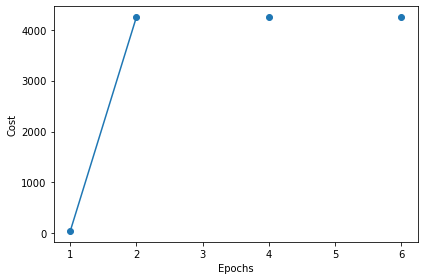

In [4]:
# da utilizzare dopo aver eseguito binary_mnist_preprocessing.py
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

class LogisticRegression:
    """ Classificatore regressione logistica con discesa del gradiente 
    
    Parametri
    ----------
    eta: float
        tasso d'apprendimento (tra 0.0 e 0.1)
    n_iter: int
        numero di epoche, ovvero passi sul dataset di training 
    randome_state: int
        seed per la generazione dei numeri casuali nell'inizializzazione dei pesi
    
    Attributi
    ----------
    w_: 1d-array
        array dei pesi dopo l'addestramento 
    cost_: list
        funzione di costo logistica (log-lkelihood) ad ogni epoca
    """
    
    def __init__(self, eta, n_iter, random_state):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
            """ Metodo fit per l'addestramento:
    
            Parametri
            ----------
            X: matrice degli esempi, shape = [n_esempi, n_caratteristiche]
                
            y: array etichette, shape = [n_esempi]
            
                
            Returns
            -------
            self : oggetto
            
            """
            rgen = np.random.RandomState(self.random_state)
            self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
            self.cost_ = []
            
            for i in range(self.n_iter):
                net_input = self.net_input(X)
                output = self.activation(net_input)
                errors = y - output
                self.w_[1:] +=self.eta * X.T.dot(errors)
                self.w_[0] += self.eta * errors.sum()
                cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
                self.cost_.append(cost)
            return self
        
    def net_input(self, X): 
        """Calcola l'input della rete"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def activation(self, z):
        """Calcola la sigmoide, funzione di attivazione della regressione logistica"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
        
    def predict(self, X):
        """Funzione di soglia per fare la predizione"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
            
# Carichiamo il Dataset
DATASET_PATH = "C:/Users/Crist//ComputerVision/Dataset/binary_mnist/binary_mnist.csv"
dataset = np.loadtxt(open(DATASET_PATH, "rb"), delimiter=",")

# Prepariamo i Dati
X = dataset[:,:-1]
y = dataset[:,-1:]
y = y.ravel()

X , y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

X_train= ((X_train / 255.) - .5) * 2
X_test= ((X_test / 255.) - .5) * 2

# Creiamo il nostro modello come oggetto della classe LogisticRegression e lo alleniamo tramite il metodo fit
lr =  LogisticRegression(eta = 0.05, n_iter = 30, random_state = 1);
lr.fit(X_train, y_train)

# Valutiamo il Modello
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("accuratezza sul dataset di training: ", accuracy_score(y_train, y_pred_train))
print("accuratezza sul dataset di test: ", accuracy_score(y_test, y_pred_test))

# Analizziamo graficamente come varia la funzione di costo ad ogni epoca
plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
